In [1]:
#import submodules

from General_modules.dataset import Dataset
from LightGBM_modules.LightGBM import LightGBM
from Conv_AE_modules.Conv_AE_main import Conv_AE_Main
from sklearn.metrics import accuracy_score
from MLflow.mlflow import MLflow
import FraeAI.FreeAI as F
import argparse
import os
import sys

In [2]:
# Create dataset
dataset = Dataset('./SKAB')
dataset.split_data()
dataset.standard_data()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


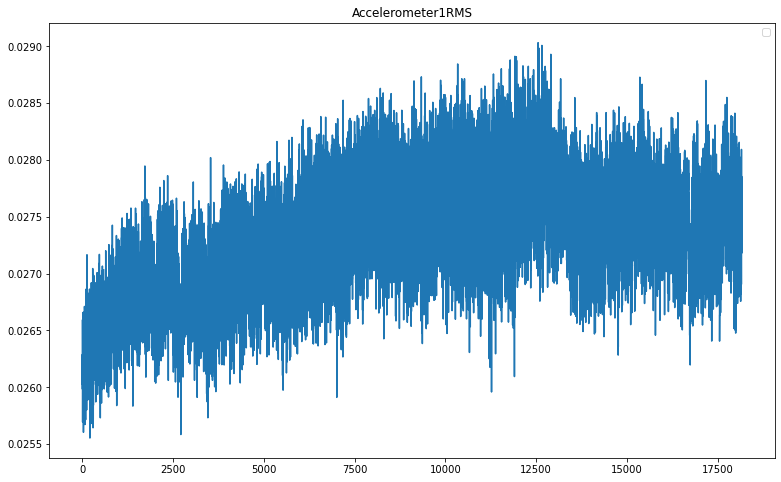

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


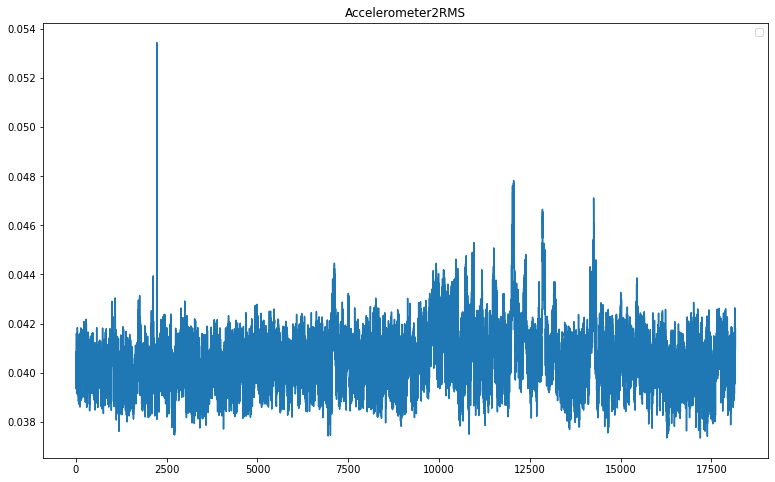

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


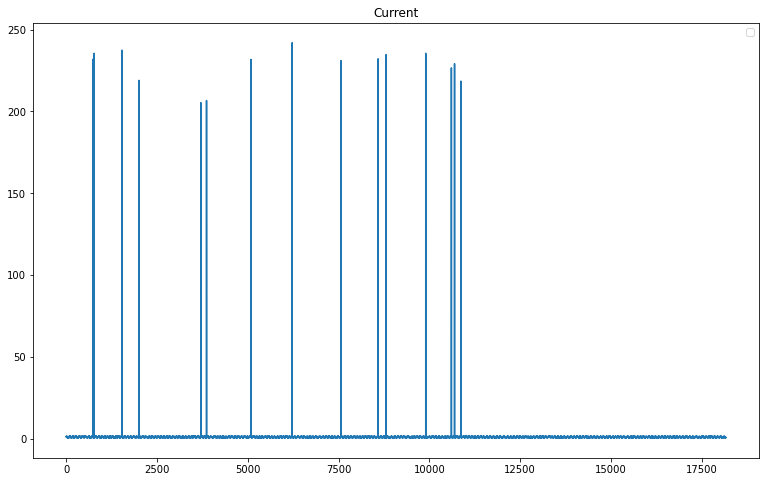

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


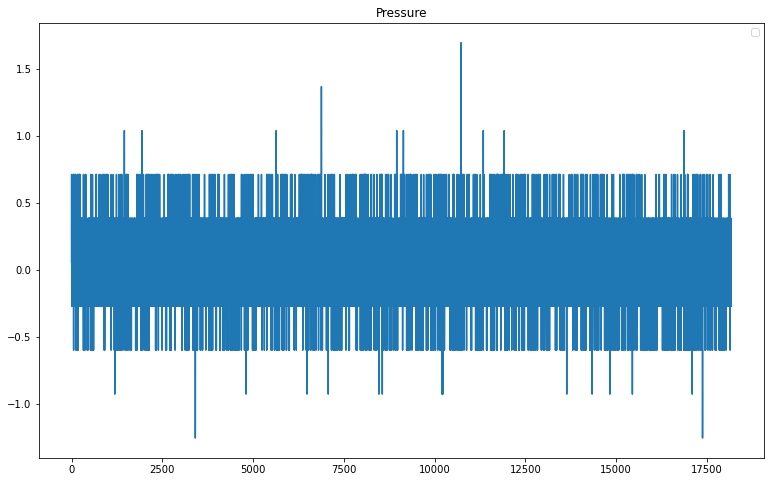

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


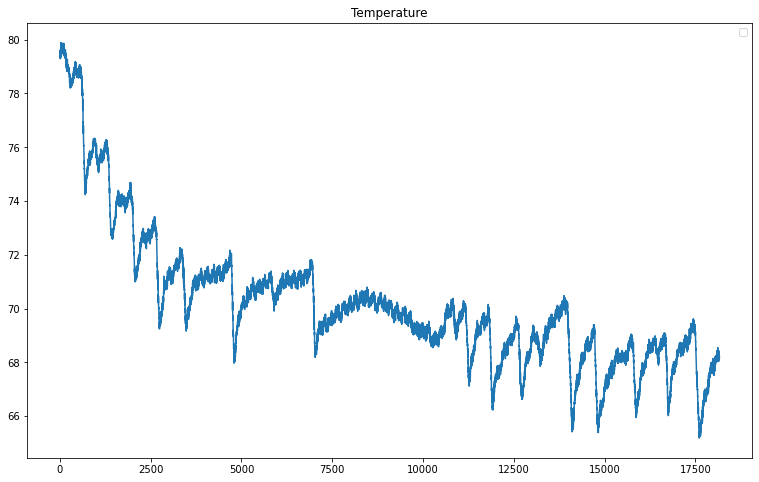

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


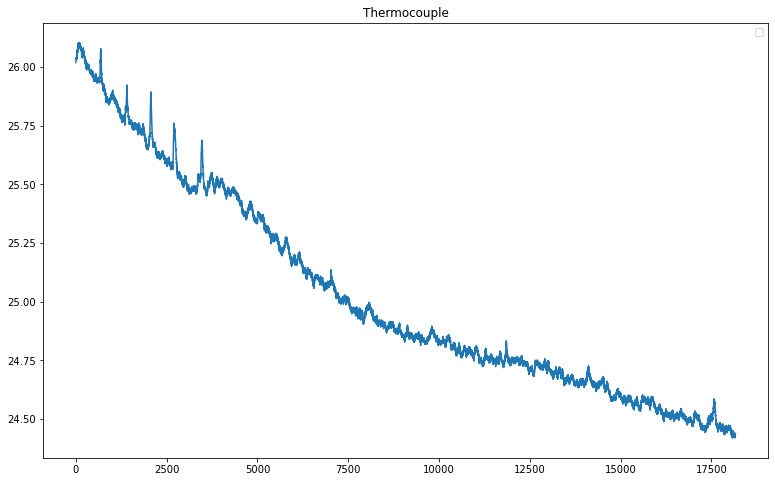

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


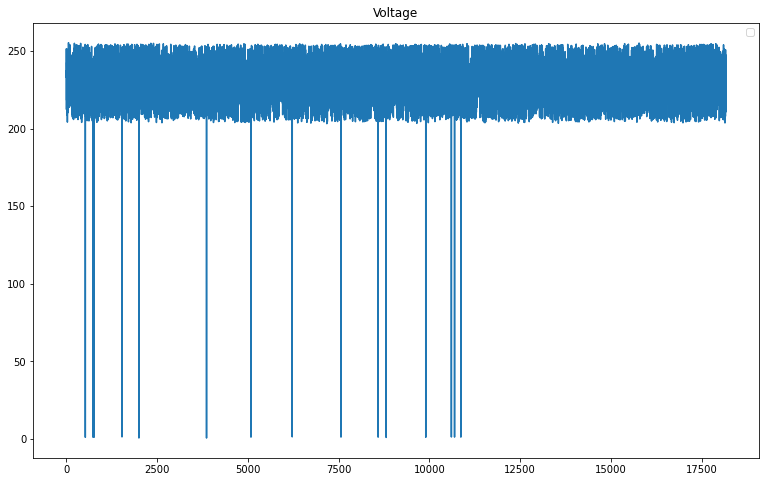

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


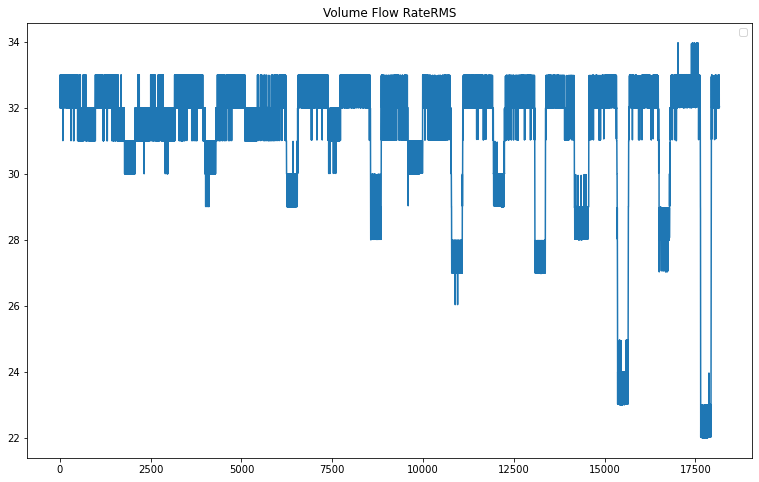

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


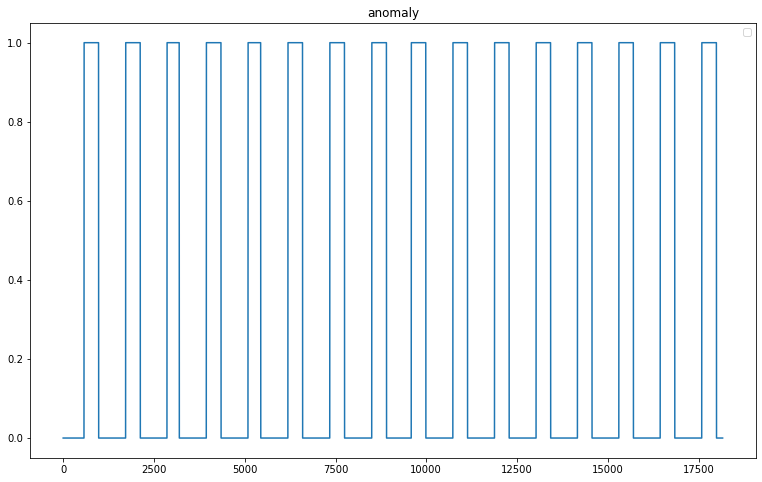

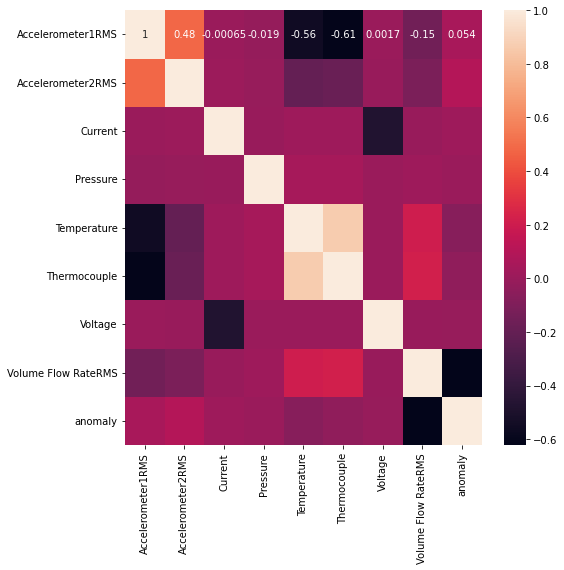

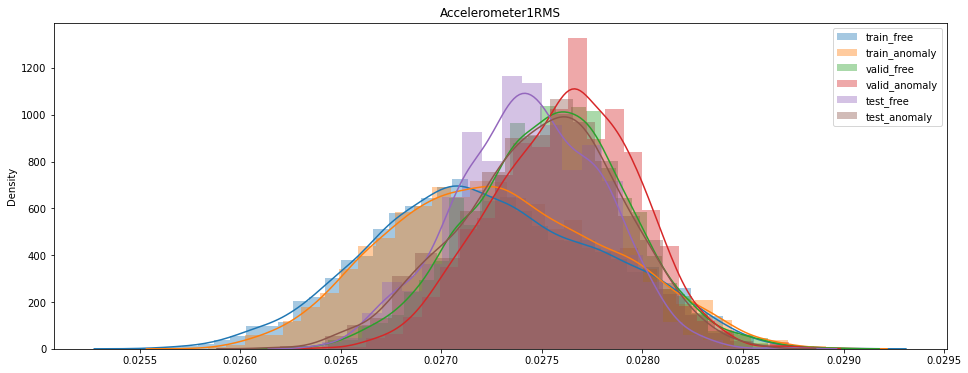

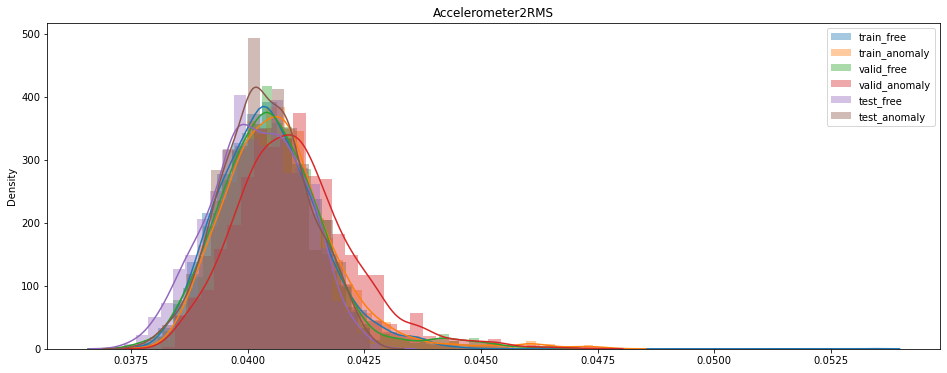

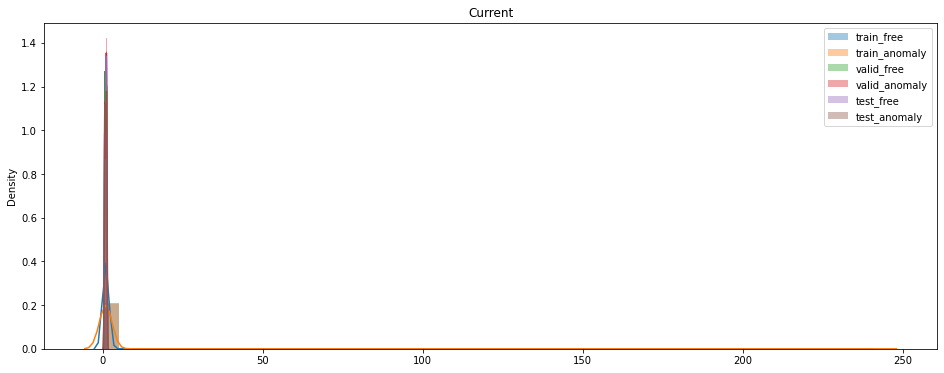

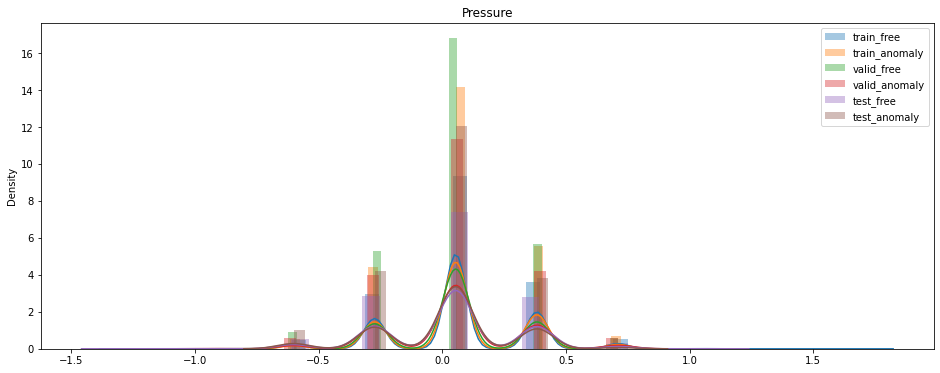

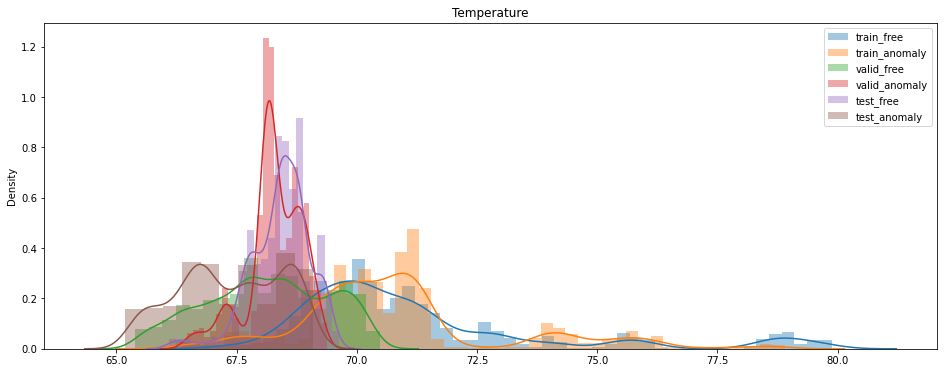

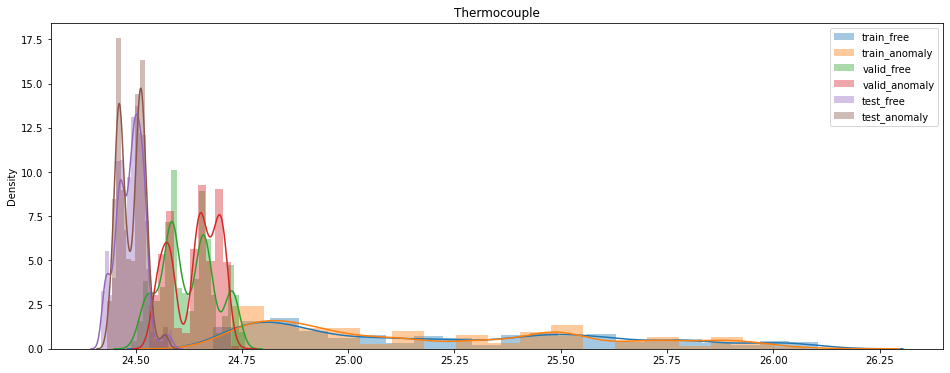

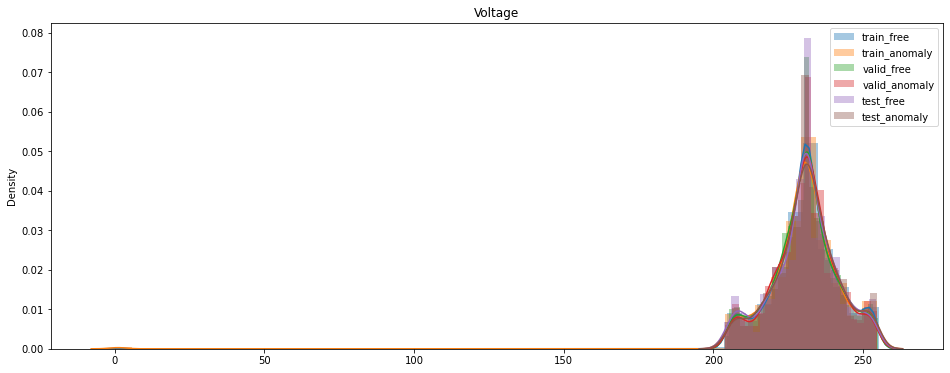

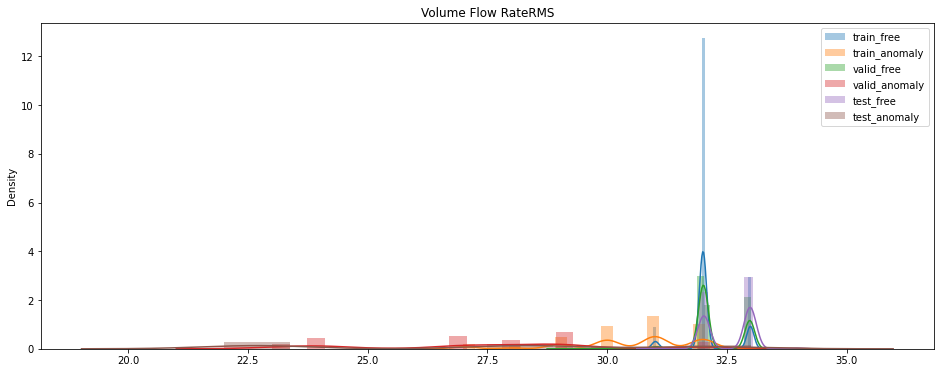

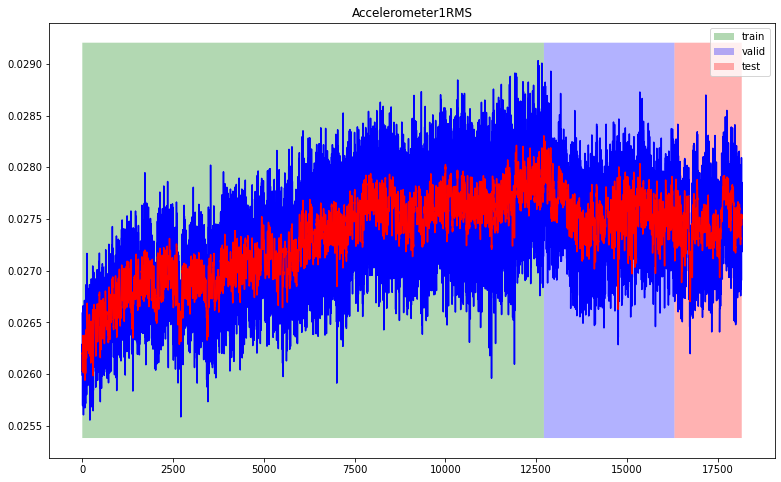

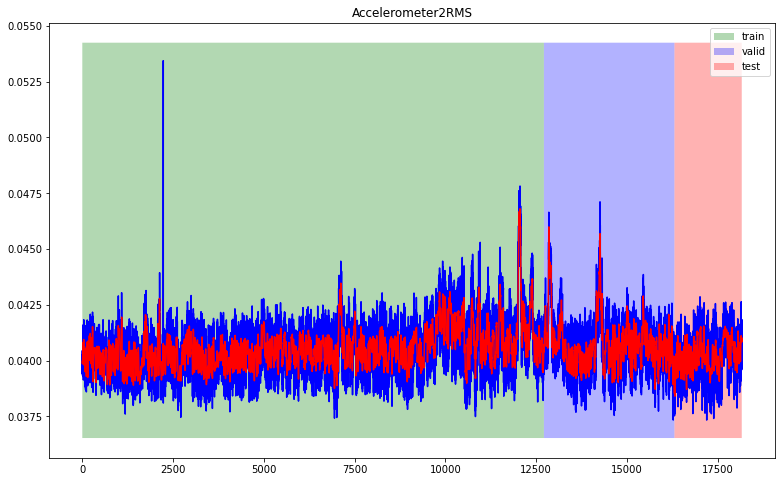

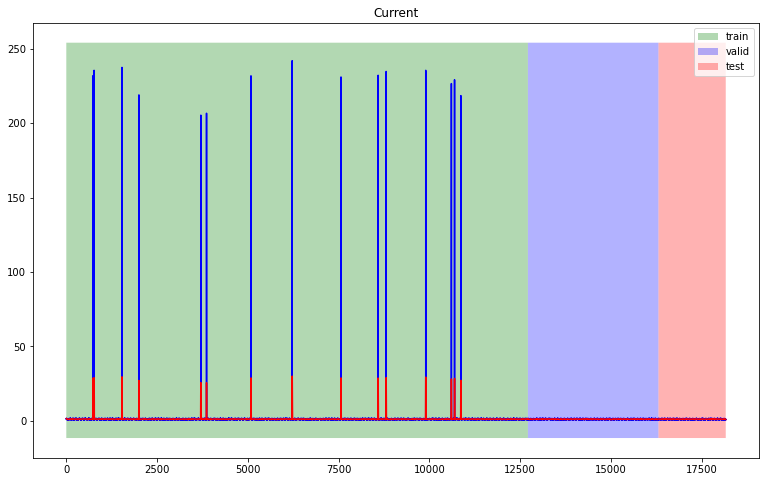

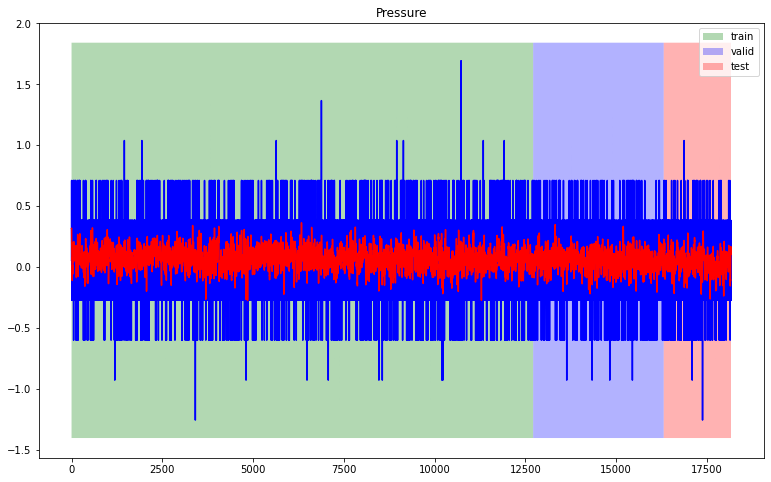

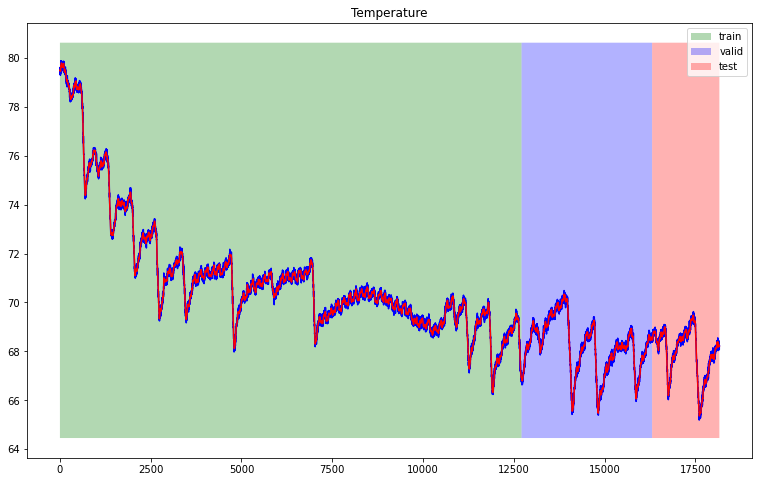

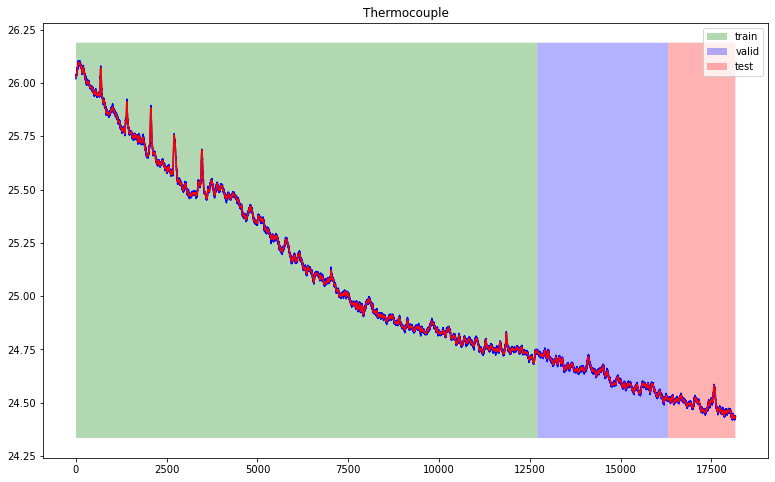

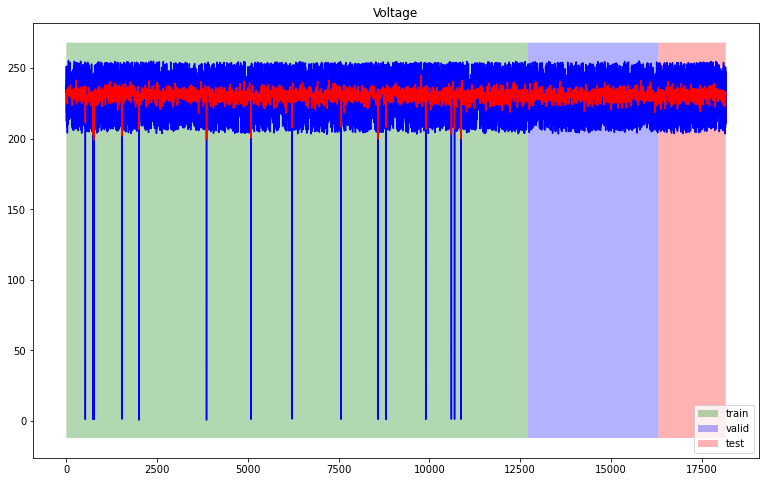

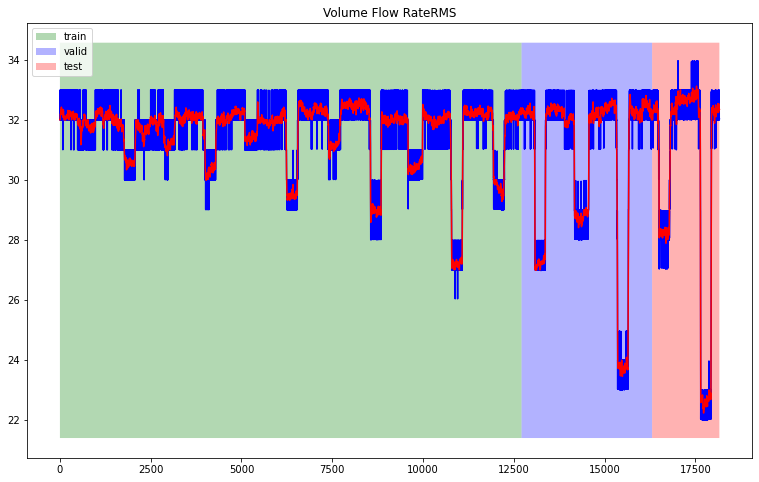

In [3]:
# Show data results
dataset.show_plt_data()
dataset.show_heatmap_data()
dataset.show_plt_free_anomaly()
dataset.show_smooth_data()

[LightGBM] [Info] Number of positive: 4309, number of negative: 8395
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 12704, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.339185 -> initscore=-0.666930
[LightGBM] [Info] Start training from score -0.666930
optimization1
train acc:0.9861460957178841valid acc:0.9567884025648173 | lr:0.04430375245218265, min_data_in_leaf:1,max_depth:6,num_leaves:23
[LightGBM] [Info] Number of positive: 4309, number of negative: 8395
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 12704, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.339185 -> initscore=-0.666930
[LightGBM] [Info] Start training from score -0.666930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

array([[1041,    0],
       [ 137,  666]])

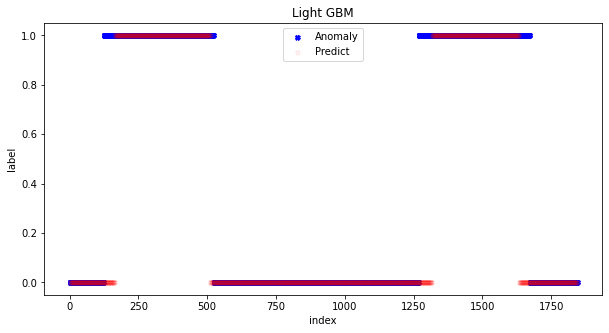

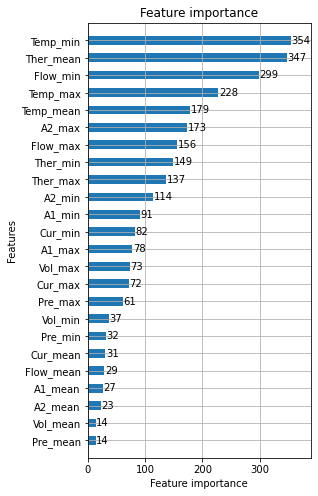

In [4]:
# Train and test using LightGBM module
lightgbm = LightGBM(dataset)
lightgbm.train()
lightgbm.hyperparams_optimization_results()
test_acc,test_f1score,test_recallscore,test_cm,test_pred,params,model = lightgbm.test()


Using IPython.display.display():


,features,leaf id,f2,f2 imp,precision,recall,size,min val1,max val1,min val2,max val2
536,Flow_max,3,0.210238,0.106486,1.0,0.175573,19.360087,0.485899,0.771553,-1000,inf
492,Flow_mean,11,0.000000,0.067854,0.0,0.000000,17.787419,0.587693,0.752081,-1000,inf
54,A1_max,11,0.531915,0.066776,1.0,0.476190,17.895879,0.712257,0.895799,-1000,inf
513,Flow_min,4,0.000000,0.061708,0.0,0.000000,7.537961,0.218962,0.541096,-1000,inf
32,A1_min,9,0.559441,0.051776,1.0,0.503937,14.425163,0.505283,0.772128,-1000,inf
9,A1_mean,10,0.415473,0.043832,1.0,0.362500,8.785249,0.609992,0.744592,-1000,inf
405,Ther_max,16,0.465839,0.035573,1.0,0.410959,6.561822,-1.731859,inf,-1000,inf
147,Cur_min,14,0.618661,0.034958,1.0,0.564815,11.822126,-0.179808,-0.153302,-1000,inf
300,Temp_mean,17,0.338983,0.033677,1.0,0.290909,10.845987,-1.167336,-1.058531,-1000,inf
215,Pre_mean,20,0.530086,0.032497,1.0,0.474359,13.286334,-0.364841,-0.120836,-1000,inf


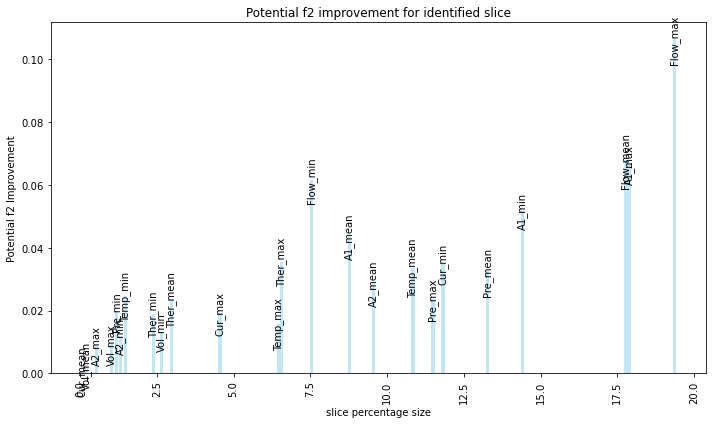

<Figure size 432x288 with 0 Axes>

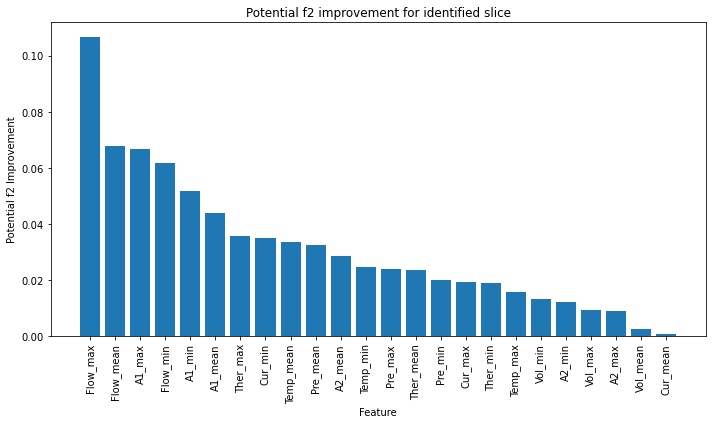

<Figure size 432x288 with 0 Axes>

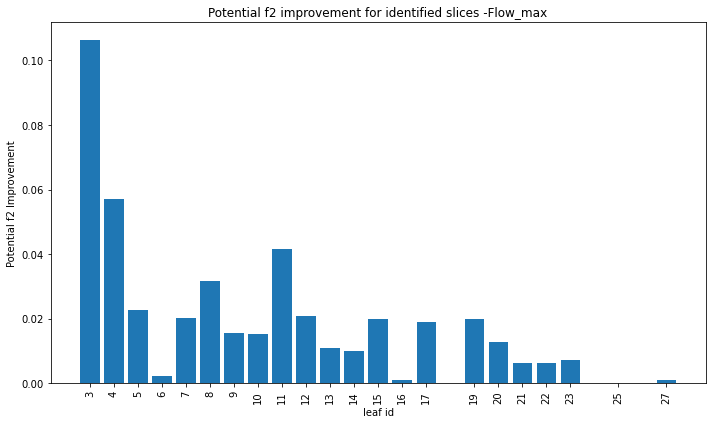

<Figure size 432x288 with 0 Axes>

In [5]:
# Run freaAI decision tree

df_fraeai_acc = F.main_func_max('LightGBM', lightgbm.test_x, test_pred, lightgbm.test_y, number_of_features=1, metric='accuracy')
df_fraeai_acc_to_mlflow = df_fraeai_acc.loc[:, ['f2','f2 imp','size','min val1','max val1','min val2','max val2']].reset_index()
df_features = df_fraeai_acc.loc[:, 'features']

In [6]:
# Save results to MLFLow
os.environ["MLFLOW_TRACKING_USERNAME"] = "stavco9@gmail.com"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "*********"
mlflow_client = MLflow('https://dbc-c3108cf4-06da.cloud.databricks.com/')
mlflow_client.run_experiment(experiment_name="/Users/stavco9@gmail.com/SKABLightGBM",
                         log_metrics_feats=df_features, log_metrics_vals=df_fraeai_acc_to_mlflow,
                         params=params, model=model, model_name="lightgbm-model",
                         train_x=lightgbm.train_x, valid_x=lightgbm.valid_x)
mlflow_client.show_experiment_results(test_x=lightgbm.test_x, test_y=lightgbm.test_y,
                                    start_index=0, end_index=50)

Experiment id is 3306339047703331
dbfs:/databricks/mlflow-tracking/3306339047703331/e07dc2da4153438cb5627698e8e12c97/artifacts


Uploading artifacts:   0%|          | 0/6 [00:00<?, ?it/s]

Registered model 'lightgbm-model' already exists. Creating a new version of this model...
2024/02/12 22:48:52 INFO mlflow.store.model_registry.abstract_store: Waiting up to 60 seconds for model version to finish creation. Model name: lightgbm-model, version 24
Created version '24' of model 'lightgbm-model'.


,A1_mean,A1_min,A1_max,A2_mean,A2_min,A2_max,Cur_mean,Cur_min,Cur_max,Pre_mean,...,Ther_min,Ther_max,Vol_mean,Vol_min,Vol_max,Flow_mean,Flow_min,Flow_max,actual_class,predicted_class
0,0.051986,-0.378105,0.575524,-1.361966,-2.128987,-0.809890,-0.076110,-0.094969,-0.051576,0.248708,...,-1.767654,-1.762478,0.579825,-0.457597,1.412863,0.538199,0.385021,0.666436,0.0,0
1,-0.029820,-0.378105,0.497272,-1.512456,-2.314790,-0.855468,-0.078517,-0.094969,-0.051576,-0.061625,...,-1.767607,-1.762478,0.388385,-0.530248,1.412863,0.510058,0.385021,0.659827,0.0,0
2,-0.093704,-0.378105,0.398144,-1.666669,-2.397596,-0.957867,-0.081201,-0.094969,-0.061649,-0.317590,...,-1.767607,-1.762478,0.168206,-0.788926,1.102047,0.482725,0.385021,0.640632,0.0,0
3,-0.131416,-0.378105,0.268243,-1.809287,-2.397596,-1.086616,-0.082911,-0.094969,-0.061649,-0.518647,...,-1.768440,-1.762478,-0.051520,-1.095207,0.885760,0.457516,0.385021,0.581787,0.0,0
4,-0.148822,-0.378105,0.094186,-1.937679,-2.397596,-1.237666,-0.083224,-0.094969,-0.064777,-0.655159,...,-1.768814,-1.762478,-0.227528,-1.095207,0.769128,0.443068,0.385021,0.560062,0.0,0
5,-0.141640,-0.378105,0.161918,-2.045832,-2.397596,-1.376700,-0.082558,-0.094969,-0.062859,-0.717402,...,-1.769993,-1.762478,-0.395687,-1.095207,0.409137,0.432763,0.385021,0.532172,0.0,0
6,-0.108550,-0.378105,0.251551,-2.131341,-2.397596,-1.512153,-0.080130,-0.094969,-0.060277,-0.711380,...,-1.770137,-1.762478,-0.533745,-1.095207,0.260449,0.427013,0.385021,0.474675,0.0,0
7,-0.054962,-0.378105,0.316133,-2.196892,-2.397596,-1.707395,-0.076727,-0.094969,-0.058413,-0.650185,...,-1.770137,-1.762478,-0.625381,-1.095207,0.114614,0.428969,0.385021,0.490033,0.0,0
8,0.017498,-0.378105,0.397387,-2.222595,-2.397596,-1.946917,-0.073934,-0.094969,-0.058413,-0.537842,...,-1.770137,-1.762478,-0.687679,-1.095207,-0.082306,0.438376,0.385021,0.546977,0.0,0
9,0.099975,-0.305010,0.446663,-2.199591,-2.397596,-1.716873,-0.071060,-0.089393,-0.058413,-0.335920,...,-1.770137,-1.763518,-0.706274,-1.095207,-0.268257,0.451999,0.385021,0.568909,0.0,0


,A1_mean,A1_min,A1_max,A2_mean,A2_min,A2_max,Cur_mean,Cur_min,Cur_max,Pre_mean,...,Ther_min,Ther_max,Vol_mean,Vol_min,Vol_max,Flow_mean,Flow_min,Flow_max,actual_class,predicted_class
0,0.051986,-0.378105,0.575524,-1.361966,-2.128987,-0.809890,-0.076110,-0.094969,-0.051576,0.248708,...,-1.767654,-1.762478,0.579825,-0.457597,1.412863,0.538199,0.385021,0.666436,0.0,0
1,-0.029820,-0.378105,0.497272,-1.512456,-2.314790,-0.855468,-0.078517,-0.094969,-0.051576,-0.061625,...,-1.767607,-1.762478,0.388385,-0.530248,1.412863,0.510058,0.385021,0.659827,0.0,0
2,-0.093704,-0.378105,0.398144,-1.666669,-2.397596,-0.957867,-0.081201,-0.094969,-0.061649,-0.317590,...,-1.767607,-1.762478,0.168206,-0.788926,1.102047,0.482725,0.385021,0.640632,0.0,0
3,-0.131416,-0.378105,0.268243,-1.809287,-2.397596,-1.086616,-0.082911,-0.094969,-0.061649,-0.518647,...,-1.768440,-1.762478,-0.051520,-1.095207,0.885760,0.457516,0.385021,0.581787,0.0,0
4,-0.148822,-0.378105,0.094186,-1.937679,-2.397596,-1.237666,-0.083224,-0.094969,-0.064777,-0.655159,...,-1.768814,-1.762478,-0.227528,-1.095207,0.769128,0.443068,0.385021,0.560062,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,0.605493,0.539058,0.671687,0.422119,0.309577,0.571264,-0.215520,-0.239449,-0.166268,-0.105155,...,-1.984872,-1.969667,0.195143,-0.425701,0.667673,0.794685,0.688437,0.850082,0.0,0
1840,0.602628,0.539058,0.671687,0.414750,0.309577,0.571264,-0.221145,-0.239449,-0.182007,0.205447,...,-1.984872,-1.968135,0.272078,-0.310426,0.667673,0.782869,0.688437,0.843350,0.0,0
1841,0.593599,0.462948,0.671687,0.420857,0.309577,0.571264,-0.225860,-0.239449,-0.200892,0.425404,...,-1.983854,-1.966729,0.282897,-0.202231,0.667673,0.772073,0.688437,0.835279,0.0,0
1842,0.584016,0.443234,0.671687,0.411833,0.309577,0.546286,-0.228449,-0.239449,-0.213932,0.573870,...,-1.983217,-1.964405,0.244384,-0.362996,0.667673,0.760766,0.688437,0.826630,0.0,0


['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure', 'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS']
57/57 [==============================] - 0s 943us/step
test_fn_count:353.0
test_fn_rate:0.4396014943960149
test_recall_rate:0.5603985056039851
accuracy_rate:0.6810577441985969


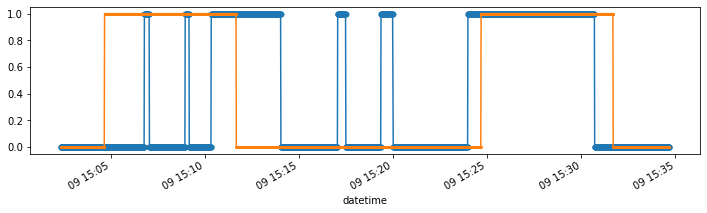

In [4]:
# Train and test ConvAE model
convae = Conv_AE_Main(dataset)
convae.train()    
test_acc,test_recallscore = convae.test()

In [5]:
# Modify dataframes to match the length of the sequences

convae.X_test_df = convae.X_test_df.reset_index(drop=True).iloc[:-(convae.N_STEPS) + 1]
convae.pred_test = convae.pred_test[:-(convae.N_STEPS) + 1]
convae.Y_test = convae.Y_test[:-(convae.N_STEPS) + 1]


Using IPython.display.display():


,features,leaf id,f2,f2 imp,precision,recall,size,min val1,max val1,min val2,max val2
186,Volume Flow RateRMS,3,0.213115,0.165614,1.000000,0.178082,16.276477,23.068850,28.985350,-1000,inf
119,Temperature,14,0.228916,0.041441,0.177570,0.246753,11.817168,67.685650,68.003300,-1000,inf
48,Accelerometer2RMS,7,0.413669,0.027144,0.479167,0.400000,18.561873,0.037732,0.039393,-1000,inf
151,Thermocouple,28,0.269231,0.021978,0.388889,0.250000,5.629877,24.526600,24.567599,-1000,inf
1,Accelerometer1RMS,2,0.145631,0.011700,0.200000,0.136364,2.675585,-1000.000000,0.026716,-1000,inf
162,Voltage,5,0.342466,0.004472,0.555556,0.312500,1.895206,-1000.000000,206.407501,-1000,inf
83,Current,16,0.000000,0.002526,0.000000,0.000000,0.334448,0.820673,0.822641,-1000,inf
99,Pressure,4,0.546448,0.001500,0.645161,0.526316,4.292085,-0.765106,-0.437180,-1000,inf


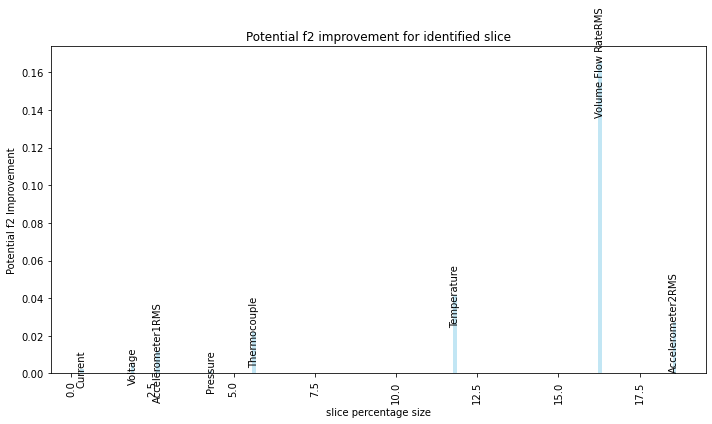

<Figure size 432x288 with 0 Axes>

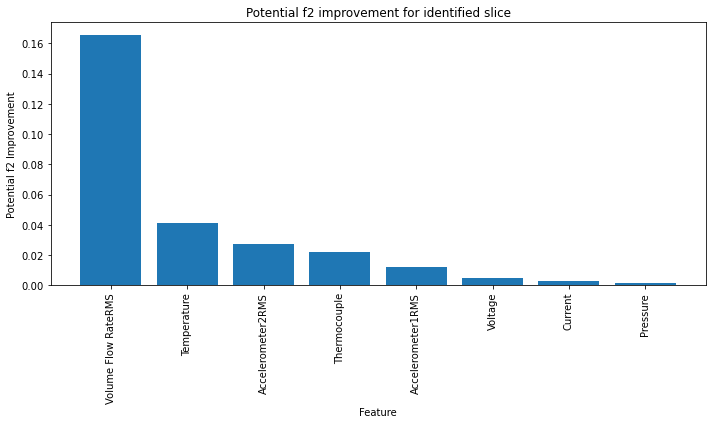

<Figure size 432x288 with 0 Axes>

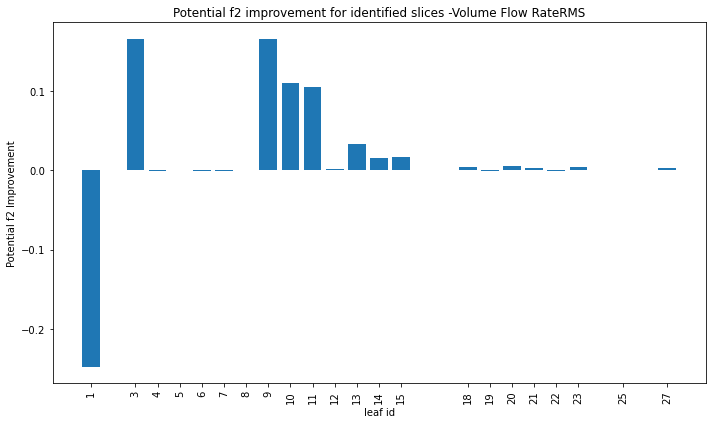

<Figure size 432x288 with 0 Axes>

In [6]:
# Run freaAI decision tree

df_fraeai_acc = F.main_func_max('ConvAE', convae.X_test_df, convae.pred_test, convae.Y_test, number_of_features=1, metric='accuracy')
df_fraeai_acc_to_mlflow = df_fraeai_acc.loc[:, ['f2','f2 imp','size','min val1','max val1','min val2','max val2']].reset_index()
df_features = df_fraeai_acc.loc[:, 'features']

In [8]:
# Save results to MLFlow
os.environ["MLFLOW_TRACKING_USERNAME"] = "stavco9@gmail.com"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "**********"
mlflow_client = MLflow('https://dbc-c3108cf4-06da.cloud.databricks.com/')
mlflow_client.run_experiment(experiment_name="/Users/stavco9@gmail.com/SKABConvAE",
                         log_metrics_feats=df_features, log_metrics_vals=df_fraeai_acc_to_mlflow,
                         model=convae.model, model_name="convae-model",
                         train_x=convae.X_train_df, valid_x=convae.X_valid_seq)

mlflow_client.show_experiment_results(test_x=convae.X_test_seq,
                                    test_x_df=convae.X_test_df,
                                    test_y=convae.Y_test,
                                    start_index=0, end_index=50)

Experiment id is 2716562521165368
dbfs:/databricks/mlflow-tracking/2716562521165368/a5a075ccef8c4d029ac646e4c7bc55cb/artifacts
111/111 [==============================] - 0s 1ms/step


Uploading artifacts:   0%|          | 0/6 [00:00<?, ?it/s]

Registered model 'convae-model' already exists. Creating a new version of this model...
2024/02/14 10:33:07 INFO mlflow.store.model_registry.abstract_store: Waiting up to 60 seconds for model version to finish creation. Model name: convae-model, version 69
Created version '69' of model 'convae-model'.


57/57 [==============================] - 0s 1ms/step


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,actual_class,predicted_class
0,0.027773,0.039028,1.326890,0.054711,68.5600,24.5135,231.830,32.9709,0.0,0
1,0.027711,0.039946,1.110150,0.054711,68.5861,24.5136,239.315,32.0000,0.0,0
2,0.027657,0.040355,1.273900,0.710565,68.4256,24.5084,240.306,32.0300,0.0,0
3,0.027274,0.039846,0.819551,0.054711,68.6263,24.5139,236.042,32.9709,0.0,0
4,0.027238,0.039922,1.101930,0.054711,68.4726,24.5196,236.624,32.0000,0.0,0
5,0.027184,0.039184,0.944864,0.382638,68.4147,24.5177,226.482,32.0000,0.0,0
6,0.026701,0.038686,1.403490,-0.273216,68.5083,24.5200,233.123,32.0000,0.0,0
7,0.027051,0.038890,0.570805,0.054711,68.7666,24.5086,217.749,32.0000,0.0,0
8,0.027089,0.038680,1.167510,-0.273216,68.5022,24.5168,232.094,32.0000,0.0,0
9,0.027079,0.038906,1.115410,0.054711,68.4750,24.5113,243.076,32.0000,0.0,0


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,actual_class,predicted_class
0,0.027773,0.039028,1.326890,0.054711,68.5600,24.5135,231.830,32.9709,0.0,0
1,0.027711,0.039946,1.110150,0.054711,68.5861,24.5136,239.315,32.0000,0.0,0
2,0.027657,0.040355,1.273900,0.710565,68.4256,24.5084,240.306,32.0300,0.0,0
3,0.027274,0.039846,0.819551,0.054711,68.6263,24.5139,236.042,32.9709,0.0,0
4,0.027238,0.039922,1.101930,0.054711,68.4726,24.5196,236.624,32.0000,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1789,0.027925,0.040151,1.007700,0.382638,68.3376,24.4297,234.000,32.0000,0.0,0
1790,0.027511,0.039989,0.988643,0.382638,68.4071,24.4353,212.455,32.0335,0.0,0
1791,0.027336,0.040748,1.227090,0.054711,68.4123,24.4353,253.970,32.9675,0.0,0
1792,0.027597,0.039445,1.024450,0.054711,68.3007,24.4429,208.909,32.0000,0.0,0
